In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [1]:
# Importing the Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

In [2]:
 # Loading the csv data
gold_data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/gld_price_data.csv')

In [3]:
gold_data.head()
# spx - a company traded
# gld - gold prices on particular dates
# usd - us dollar value
# slv - silver prices
# eur/use - european dollar price to us dollar price

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [5]:
# print first 5 rows in the dataframe
gold_data.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [6]:
# print last 5 rows of the dataframe
gold_data.tail()

,Date,SPX,GLD,USO,SLV,EUR/USD
2285,5/8/2018,2671.919922,124.589996,14.0600,15.5100,1.186789
2286,5/9/2018,2697.790039,124.330002,14.3700,15.5300,1.184722
2287,5/10/2018,2723.070068,125.180000,14.4100,15.7400,1.191753
2288,5/14/2018,2730.129883,124.489998,14.3800,15.5600,1.193118
2289,5/16/2018,2725.780029,122.543800,14.4058,15.4542,1.182033


In [7]:
# number of rows and columns
gold_data.shape

(2290, 6)

In [8]:
# getting some basic informations about the data
gold_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [9]:
# checking the number of missing values
gold_data.isnull().sum()

Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

In [10]:
# getting the statistical measures of the data
gold_data.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303296
75%,2073.010070,132.840004,37.827501,22.882499,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


In [11]:
gold_data.describe(include=['O'])

,Date
count,2290
unique,2290
top,10/3/2013
freq,1


Correlation:
1. Positive Correlation
2. Negative Correlation

In [12]:
correlation = gold_data.corr()
correlation

,SPX,GLD,USO,SLV,EUR/USD
SPX,1.000000,0.049345,-0.591573,-0.274055,-0.672017
GLD,0.049345,1.000000,-0.186360,0.866632,-0.024375
USO,-0.591573,-0.186360,1.000000,0.167547,0.829317
SLV,-0.274055,0.866632,0.167547,1.000000,0.321631
EUR/USD,-0.672017,-0.024375,0.829317,0.321631,1.000000


In [15]:
type(correlation)

pandas.core.frame.DataFrame

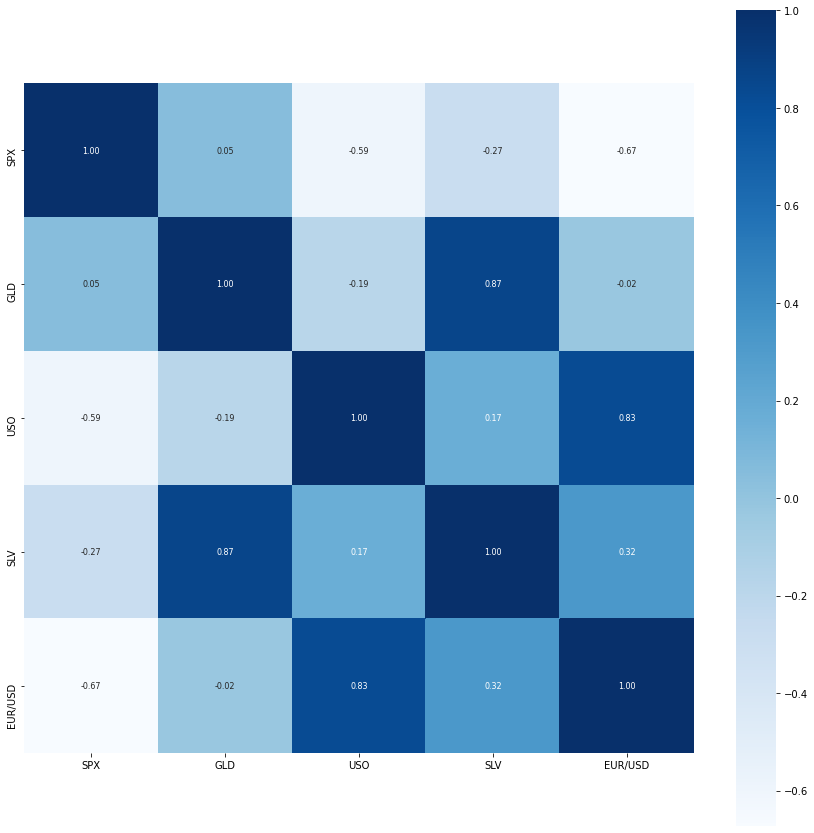

In [17]:
# constructing a heatmap to understand the correlatiom
plt.figure(figsize = (15,15))
sns.heatmap(correlation, cbar=True, square=True, fmt='.2f',annot=True, annot_kws={'size':8}, cmap='Blues')

In [16]:
# correlation values of GLD
print(correlation['GLD'])

SPX        0.049345
GLD        1.000000
USO       -0.186360
SLV        0.866632
EUR/USD   -0.024375
Name: GLD, dtype: float64


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


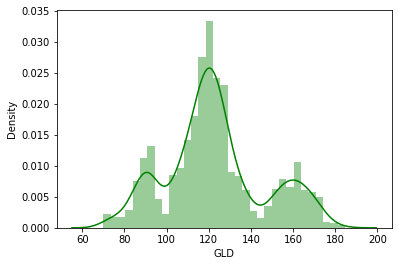

In [18]:
# checking the distribution of the GLD Price
sns.distplot(gold_data['GLD'],color='green')

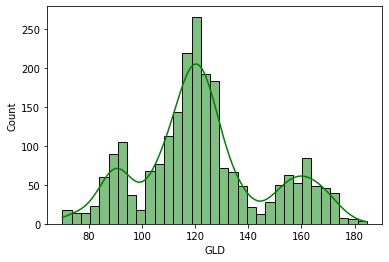

In [21]:
sns.histplot(gold_data['GLD'],color='green', kde=True)

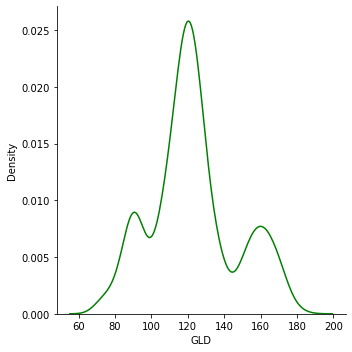

In [28]:
sns.displot(gold_data['GLD'],color='green', kind='kde')

Splitting the Features and Target

In [29]:
X = gold_data.drop(['Date','GLD'],axis=1)
Y = gold_data['GLD']

In [30]:
print(X)

              SPX        USO      SLV   EUR/USD
0     1447.160034  78.470001  15.1800  1.471692
1     1447.160034  78.370003  15.2850  1.474491
2     1411.630005  77.309998  15.1670  1.475492
3     1416.180054  75.500000  15.0530  1.468299
4     1390.189941  76.059998  15.5900  1.557099
...           ...        ...      ...       ...
2285  2671.919922  14.060000  15.5100  1.186789
2286  2697.790039  14.370000  15.5300  1.184722
2287  2723.070068  14.410000  15.7400  1.191753
2288  2730.129883  14.380000  15.5600  1.193118
2289  2725.780029  14.405800  15.4542  1.182033

[2290 rows x 4 columns]


In [32]:
type(X)

pandas.core.frame.DataFrame

In [31]:
print(Y)

0        84.860001
1        85.570000
2        85.129997
3        84.769997
4        86.779999
           ...    
2285    124.589996
2286    124.330002
2287    125.180000
2288    124.489998
2289    122.543800
Name: GLD, Length: 2290, dtype: float64


Splitting into Training data and Test Data

In [36]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=2, stratify=None)

In [35]:
train_test_split?

Model Training:
Random Forest Regressor

In [37]:
regressor = RandomForestRegressor()

In [40]:
RandomForestRegressor?

In [43]:
from sklearn.model_selection import GridSearchCV

parameters = {'n_estimators':[100, 50, 30, 150, 80, 150, 200], 'max_leaf_nodes': [5, 10, 15, 20, 30]}

regressor_cv = GridSearchCV(regressor, parameters) # cv=5 by default

regressor_cv.fit(X_train, Y_train)

regressor_cv.best_params_

{'max_leaf_nodes': 30, 'n_estimators': 50}

In [44]:
regressor_cv.best_score_

0.9768144936330078

In [45]:
regressor_best = RandomForestRegressor(max_leaf_nodes= 30, n_estimators=50)
regressor_best.fit(X_train, Y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=30,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=50, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [46]:
regressor_best.base_estimator_

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [49]:
feature_importance = pd.DataFrame(regressor_best.feature_importances_.T, index=X.columns)
feature_importance

,0
SPX,0.165102
USO,0.034196
SLV,0.775758
EUR/USD,0.024944


Model Evaluation

In [50]:
# prediction on Test Data
test_data_prediction = regressor_best.predict(X_test)

In [51]:
print(test_data_prediction)

[167.0226984   87.25578423 117.19173737 123.48719645 118.06831349
 153.93339478 151.32681312 123.85945044 120.30159423 128.25407372
 116.7414563  172.7664391  138.9473279  166.68035318 116.10941657
 118.31679137 147.26843781 167.94825689 161.51282381 157.33860029
 154.07512013 122.93283643 174.25747345 152.91770929 124.17838103
  92.14956437  80.68817541 122.96453972 120.38229645 166.11059093
  90.26712883 123.53005612  92.31122991 117.19173737 119.99433124
 136.01587166 116.89292362 116.82629396 151.79125806 111.65289872
 104.66793327  87.83616662 124.04506252 118.9661687  153.91354809
 122.42705711 104.78426113 105.1853596   92.55972364 128.25407372
  75.87233313 116.53769581 120.84443    111.65289872 123.35979137
 122.01648351 160.0461745  165.63688376 145.0516702   87.27258071
  92.55972364  87.27258071  91.03108471 117.18013932 124.17838103
 128.25407372 164.1077031  123.73381661 117.68779221 100.20937598
 165.86654891 144.87518207 133.3570737  120.40213172 122.01648351
 122.96453

In [52]:
# R squared error
error_score = metrics.r2_score(Y_test, test_data_prediction)
print("R squared error : ", error_score)

R squared error :  0.9753519865898969


Compare the Actual Values and Predicted Values in a Plot

In [53]:
Y_test = list(Y_test)

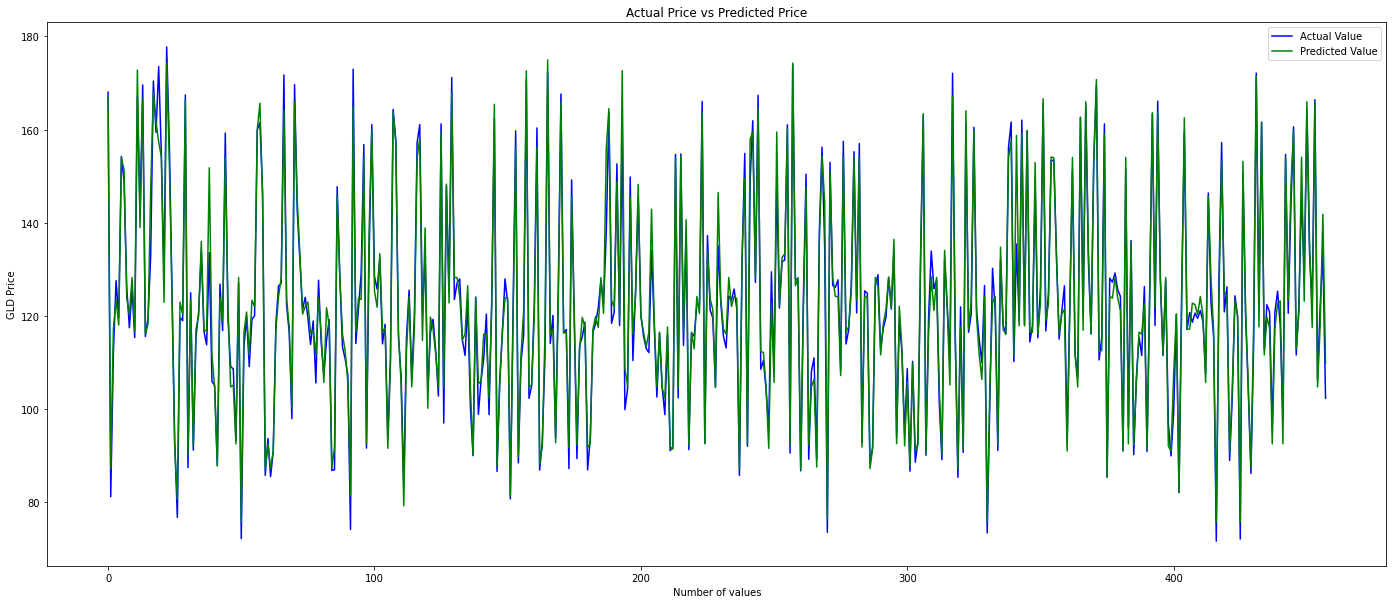

In [58]:
plt.figure(figsize=(24,10))
plt.plot(Y_test, color='blue', label = 'Actual Value')
plt.plot(test_data_prediction, color='green', label='Predicted Value')
plt.title('Actual Price vs Predicted Price')
plt.xlabel('Number of values')
plt.ylabel('GLD Price')
plt.legend()
plt.show()

Text(0, 0.5, 'test prediction')

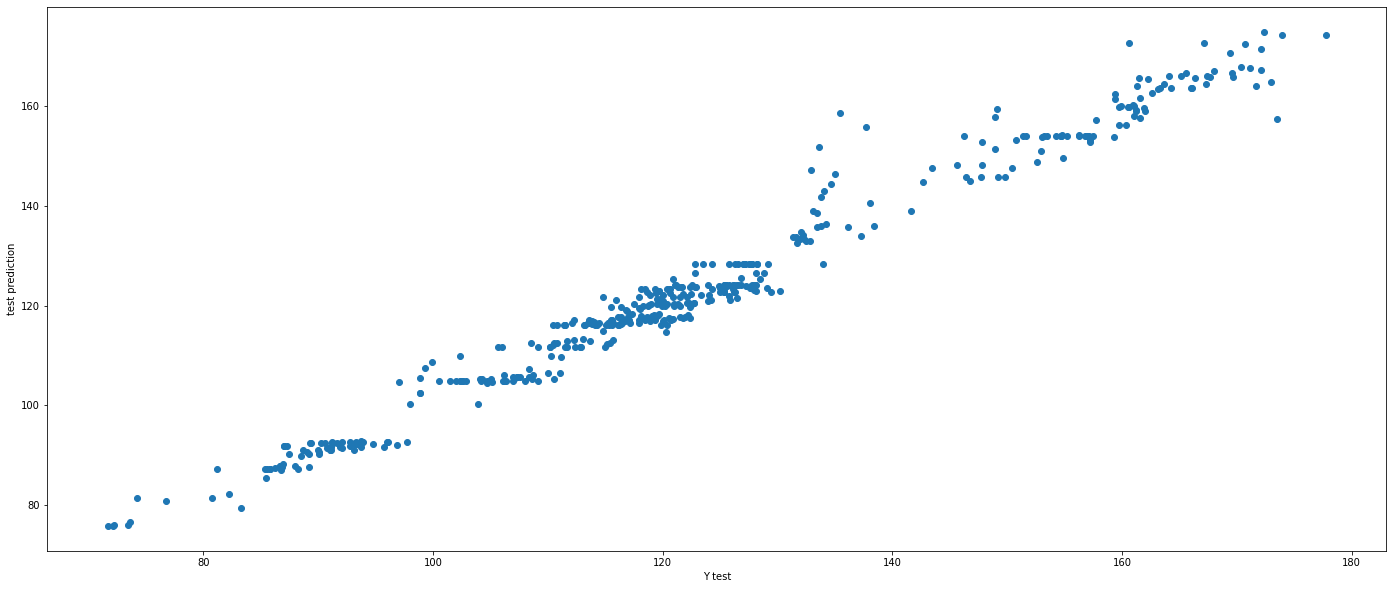

In [60]:
plt.figure(figsize=(24,10))
plt.scatter(Y_test, test_data_prediction)
plt.xlabel('Y test')
plt.ylabel('test prediction')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0, 0.5, 'test prediction')

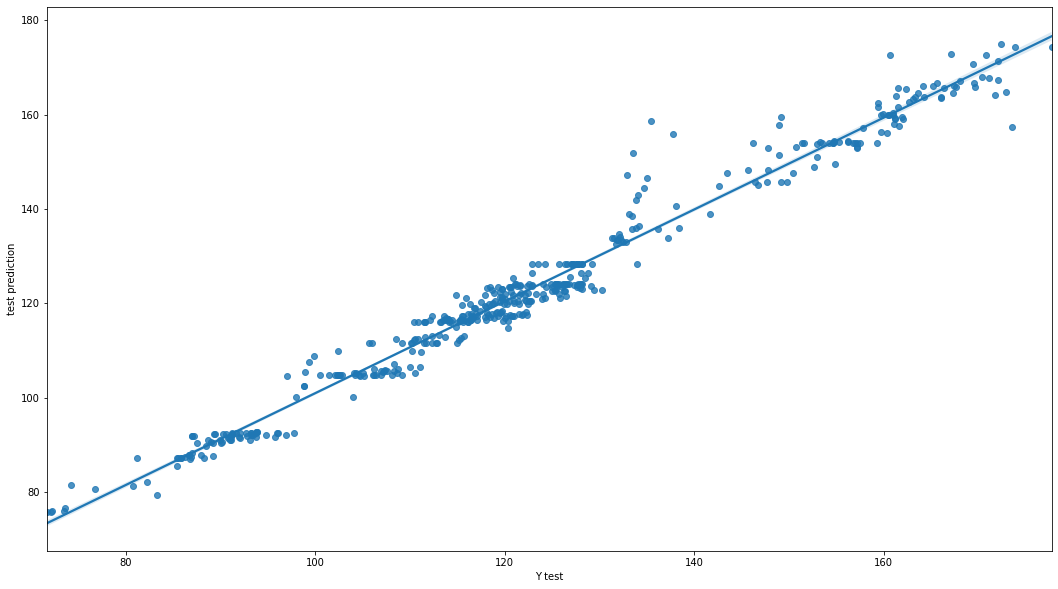

In [63]:
plt.figure(figsize=(18,10))
sns.regplot(Y_test, test_data_prediction)
plt.xlabel('Y test')
plt.ylabel('test prediction')